# <center>Data Science Training - AXA Data Innovation Lab</center>
<center><b>Model Apply Template</b><br>
Jiannan, 2016</center>

In [12]:
import numpy as np
import pandas as pd

import sklearn as sk
from sklearn.externals import joblib
import xgboost as xgb

%matplotlib inline
import matplotlib.pyplot as plt

from __future__ import division
from __future__ import print_function

# Read file

In [2]:
dataset_modelA_clean = pd.read_csv("/group/axa_thai/jiannan/AXAKT_Delivery/Data/dataset_2016-05.csv",sep="|",na_values=["\N", "NULL"])
#input file path

# Get Feature columns

In [3]:
ALL_TARGETS = ['target_all']

targeting_features_file = '/group/axa_thai/jiannan/AXAKT_Delivery/Cols/short_modelA_targeting_features.csv' #'feature_columns_metadata_path' 
feature_df_targeting = pd.read_csv(targeting_features_file,na_values=["\N","NULL"])

feature_columns = feature_df_targeting.targeting_features.tolist()

print(len(feature_columns))

38


In [4]:
# prepare for applying dataset for predicting 
dataset_modelA_clean_targeting = dataset_modelA_clean[feature_columns].copy()

# Apply targeting ModelA

In [5]:
print('READING MODELA PICKLE')
clf_targeting = joblib.load('/group/axa_thai/jiannan/test_model.pkl')

READING MODELA PICKLE


In [8]:
print('APPLY PREDICTING MODEL')
results = dataset_modelA_clean_targeting[['svocmasterid']].copy()

test_X = dataset_modelA_clean_targeting[feature_columns].drop(['svocmasterid'], axis=1).reset_index(drop=True)
_probas = clf_targeting.predict_proba(test_X)

proba = _probas[:, 1]
cols = ['proba_target_all']
proba_df = pd.DataFrame(data=proba, index=dataset_modelA_clean_targeting[feature_columns].index, columns=cols)
results = pd.concat([results, proba_df], axis=1)

APPLY PREDICTING MODEL


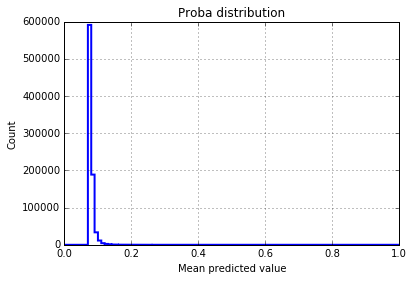

In [15]:
#proba distribution for all customers

plt.hist(results.proba_target_all, range=(0, 1), bins=100, label="proba distribution", histtype="step", lw=2)
plt.xlabel("Mean predicted value")
plt.ylabel("Count")
plt.title('Proba distribution')
plt.grid(True)

plt.show()

In [10]:
results.to_csv('/group/axa_thai/jiannan/test_final_scores.csv', sep='|', index=False)